<a href="https://colab.research.google.com/github/vinisilvanunes/P1PLN/blob/master/Aula_13_Redes_Neurais_em_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais em PLN

## Implementação 1: Modelo de Rede Neural de Recorrência

### Passo 1: Configuração do Ambiente no Google Colab

In [ ]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


Explicação:
*   numpy: Para operações numéricas.
*   tensorflow.keras: A API de alto nível para construir e treinar modelos de deep learning.
*   Embedding: camada que transforma palavras (indices numéricos) em vetores densos.
*   SimpleRNN: A camada de Rede Neural recorrente mais básica.
*   Dense: Camada neural comum (fully connected layer).
*   Tokenizer: Para converter texto em sequências de números.
*   pad_sequences: Para garantir que todas as sequências de entrada tenham o mesmo comprimento.



### Passo 2: Preparação do Conjunto de Dados

In [ ]:
# Conjunto de dados de treinamento (pequeno e simplificado)
textos_treinamento = [
    "eu gosto de programar em python",
    "python é uma linguagem poderosa",
    "programar é divertido com python",
    "aprenda python e seja feliz",
    "gosto de aprender coisas novas",
]
print(f"Textos de treinamento: {textos_treinamento}")

Textos de treinamento: ['eu gosto de programar em python', 'python é uma linguagem poderosa', 'programar é divertido com python', 'aprenda python e seja feliz', 'gosto de aprender coisas novas']


In [ ]:
# Inicializar o Tokenizer
tokenizer = Tokenizer()

# Construir o vocabulário a partir dos textos
tokenizer.fit_on_texts(textos_treinamento)

# Converter textos em sequências de números
sequencias = tokenizer.texts_to_sequences(textos_treinamento)

# Imprimir o vocabulário e as sequências geradas
print(f"\nVocabulário (palavra: índice): {tokenizer.word_index}")
print(f"Sequências numéricas dos textos: {sequencias}")

# Calcular o tamanho do vocabulário (+1 para incluir o 0 de padding)
total_palavras = len(tokenizer.word_index) + 1
print(f"Tamanho total do vocabulário: {total_palavras}")


Vocabulário (palavra: índice): {'python': 1, 'gosto': 2, 'de': 3, 'programar': 4, 'é': 5, 'eu': 6, 'em': 7, 'uma': 8, 'linguagem': 9, 'poderosa': 10, 'divertido': 11, 'com': 12, 'aprenda': 13, 'e': 14, 'seja': 15, 'feliz': 16, 'aprender': 17, 'coisas': 18, 'novas': 19}
Sequências numéricas dos textos: [[6, 2, 3, 4, 7, 1], [1, 5, 8, 9, 10], [4, 5, 11, 12, 1], [13, 1, 14, 15, 16], [2, 3, 17, 18, 19]]
Tamanho total do vocabulário: 20


In [ ]:
# Preparar Entradas (x) e Saídas (y) para aprevisão da próxima palavra
# a entrada (x) será uma sequência de palavras, e a saída (y) será a palavra seguinte.
# Determinar o comprimento máximo das sequências para padding
max_comprimento = max(len(seq) for seq in sequencias)
print(f"\nComprimento máximo das sequências antes do padding: {max_comprimento}")

# Criar pares de entrada (sequência parcial) e saida (próxima palavra)
# Ex: "eu gosto de programar" -> "em"
#     "gosto de programar em" -> "python"
entradas_x = []
saidas_y = []

for seq in sequencias:
    for i in range(1, len(seq)):
        entradas_x.append(seq[:i]) # A sequência até a palavra atual
        saidas_y.append(seq[i])    # A próxima palavra

print(f"Exemplo de entradas_x (parcial): {entradas_x[0:5]}")
print(f"Exemplo de saidas_y (parcial): {saidas_y[0:5]}")

# Padronizar o comprimento das sequências de entrada
# Todas as seuências de entrada precisam ter o mesmo comprimento para a RNN
entradas_X_padded = pad_sequences(entradas_x, maxlen=max_comprimento -1, padding='pre')
# O maxlen é `max_comprimento -1` porque saída `y` é a última palavra, então X sempre terá 1 palavra a menos.

# Converter as saídas para o formato one-hot encoding
# Isso é necessário para a camada de saída da RNN (softmax)
saidas_Y_one_hot = tf.keras.utils.to_categorical(saidas_y, num_classes=total_palavras)

print(f"\nExemplo de entradas_x_padded (após padding e truncagem): \n{entradas_X_padded[0:5]}")
print(f"Exemplo de saidas_y_one_hot (após one-hot encoding): \n{saidas_Y_one_hot[0:5]}")
print(f"Formato final das entradas (x): {entradas_X_padded.shape}")
print(f"Formato final das saídas (y): {saidas_Y_one_hot.shape}")


Comprimento máximo das sequências antes do padding: 6
Exemplo de entradas_x (parcial): [[6], [6, 2], [6, 2, 3], [6, 2, 3, 4], [6, 2, 3, 4, 7]]
Exemplo de saidas_y (parcial): [2, 3, 4, 7, 1]

Exemplo de entradas_x_padded (após padding e truncagem): 
[[0 0 0 0 6]
 [0 0 0 6 2]
 [0 0 6 2 3]
 [0 6 2 3 4]
 [6 2 3 4 7]]
Exemplo de saidas_y_one_hot (após one-hot encoding): 
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Formato final das entradas (x): (21, 5)
Formato final das saídas (y): (21, 20)


Explicação:


*   Geração de Pares (Sequência -> Próxima palavra): Para treinar a RNN a prever a próxima palavra, transformamos cada frase em multiplos pares de (sequência parcial, próxima palavra).
*   pad_sequences: É vital. Como as sequências parciais têm comprimentos variados, pad_sequences preenche (com zeros, por padrão) as sequências mais curtas para que todas tenham o mesmo maxlen. O padding='pre' significa que os zeros são adicionados no inicio.
*   to_categorical: A camada de saida da RNN (com softmax) produz uma probabilidade para cada palavra no vocabulário. to_categorical converte o indice da palavra real em um vetor onde apenas a posição da palavra correta é 1 e o resto é 0 (chamado de one-hot encoding).



### Passo 3: Construção do Modelo RNN

In [ ]:
# 1. Definindo o modelo
# Definir a arquitetura do modelo RNN
modelo_rnn = Sequential()

# Camada de Embedding:
# total_palavras: tamanho do vocabulário
# 10: dimensão do vetor de embedding (quantas características queremos para cada palavra)
# input_length: comprimento das sequências de entrada (maxlen - 1)
modelo_rnn.add(Embedding(total_palavras, 10, input_length=entradas_X_padded.shape[1]))

# Camada SimpleRNN:
# 32: número de unidades (neurônios) na camada recorrente. Este é o tamanho de estado oculto.
modelo_rnn.add(SimpleRNN(32))

# Camada Densa de Saída:
# total_palavras: número de neurônios de saída (um para cada palavra no vocabulário)
# activation = 'softmax': função de ativação para probabilidade (soma 1 para todas as palavras)
modelo_rnn.add(Dense(total_palavras, activation='softmax'))

# Compilar o modelo
modelo_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Imprimir a arquitetura do modelo
modelo_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Explicação da Arquitetura:

*   Embedding Layer: Essencial em PLN. Ela mapeia cada palavra (representada por seu indice numérico) para um vetor denso de embedding. Este vetor captura relações semânticas entre as palavras. Por Exemplo, palavras com significados semelhantes estarão "próximas" no espaço de embedding.
*   SampleRNN Layer: Esta é a camada recorrente. Ela recebe as sequências de embeddings e processa-as passo a passo. O 32 indica a dimensão do vetor de estado oculto (ou seja, a "memória" que a RNN carrega ao longo do tempo).
*   Dense (Output) Layer: Esta camadafinal recebe o estado oculto final da SimpleRNN e o transforma em um vetor de probabilidades, onde cada posição corresponde a uma palavra do vocabulário, A função softmax garante que a soma dessas probabilidades seja 1.

### Passo 4: Treinamento de modelo

In [ ]:
# Treinando o modelo
print("\nIniciando o treinamento do modelo RNN...")
modelo_rnn.fit(entradas_X_padded, saidas_Y_one_hot, epochs=100, verbose=1)
    # epochs: quantas vezes o modelo verá todo o conjunto de dados
    # verbose: 1 para mostrar o proggresso do treinamento
print("Treinamento concluido!")


Iniciando o treinamento do modelo RNN...
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0952 - loss: 2.9877
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.1429 - loss: 2.9785
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.1429 - loss: 2.9693
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.2381 - loss: 2.9600
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.1905 - loss: 2.9507
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.2381 - loss: 2.9412
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.2381 - loss: 2.9316
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.1905 - loss: 2.9217
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.1429 - loss: 2.9117
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1429 - loss: 2.9013
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1429 - loss: 2.8907
Epoch 12/100
1/1 ━━━━━━━━━━━━

### Passo 5: Usar o Modelo para Previsão

In [ ]:
# 1. Função de Previsão:
def prever_proxima_palavra(modelo, tokenizer, max_seq_len, texto_base):
  """
  Prevê a próxima palavra dado um texto base.
  """
  # Converter o texto base para sequência numárica
  sequencia_numerica = tokenizer.texts_to_sequences([texto_base])[0]


  # Padronizar o comprimento da sequência de entrada (precisa ter o mesmo formato que p treinamento)
  # Atenção: max_seq_len deve ser o comprimento que as "entradas" foram pad_sequenciadas
  sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='pre')

  # Fazer a previsão
  previsao_probabilidades = modelo.predict(sequencia_padded, verbose=0)[0]

  # Obter o índice da palavra com a maior probabilidade
  indice_palavra_prevista = np.argmax(previsao_probabilidades)

  # Converter o índice de volta para a palavra
  for palavra, indice in tokenizer.word_index.items():
    if indice == indice_palavra_prevista:
      return palavra
  return None # Caso a palavra não seja encontrada (improvável com o vocabulário ajustado)

# Comprimento de entrada esperando pelo modelo
# entradas_x_padded.shape[1] é o maxlen que usamos no pad_sequences para x
comprimento_entrada_modelo = entradas_X_padded.shape[1]

# Testar o modelo com novas frases
print("\n--- Testando o Modelo RNN ---")

texto_teste_1 = "eu gosto de"
proxima_1 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_1)
print(f"Texto: '{texto_teste_1}' -> Próxima palavra prevista: '{proxima_1}'")

texto_teste_2 = "python é uma"
proxima_2 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_2)
print(f"Texto: '{texto_teste_2}' -> Próxima palavra prevista: '{proxima_2}'")

texto_teste_3 = "programar é divertido"
proxima_3 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_3)
print(f"Texto: '{texto_teste_3}' -> Próxima palavra prevista: '{proxima_3}'")

texto_teste_4 = "aprenda python e"
proxima_4 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_4)
print(f"Texto: '{texto_teste_4}' -> Próxima palavra prevista: '{proxima_4}'")

# Exemplo com palavra fora do vocabulário (ou sequência que o modelo nunca viu antes)
texto_teste_5 = "o sol brilha no"
proxima_5 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_5)
print(f"Texto: '{texto_teste_5}' -> Próxima palavra prevista: '{proxima_5}'")


--- Testando o Modelo RNN ---
Texto: 'eu gosto de' -> Próxima palavra prevista: 'programar'
Texto: 'python é uma' -> Próxima palavra prevista: 'linguagem'
Texto: 'programar é divertido' -> Próxima palavra prevista: 'com'
Texto: 'aprenda python e' -> Próxima palavra prevista: 'seja'
Texto: 'o sol brilha no' -> Próxima palavra prevista: 'é'


## Implementação 2: Modelo de Rede Neural Rede Long Short-Term Memory

### Passo 1: Configuração do Ambiente e Importação de Bibliotecas

In [ ]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


O que tem de novo aqui?

*   LSTM: A camada de Rede Long Short-Term Memory.
*   train_test_split (sklearn): Paradividiro dataset em conjuntos de treinamentoe teste.
*   classification_report, confusion_matrix (sklearn): Para avaliar o desempenho do modelo.
*   matplotlib.pyplot, seaborn: Para visualização dos resultados.

### Passo 2: Preparação do Conjunto de Dados de Análise de Sentimentos

In [ ]:
# Definir o Conjunto de Dados (Frames e Rótulos) para análise de sentimentos
dados_sentimento = [
    ("este filme é ótimo e divertido","positivo"),
    ("eu adorei o livro, muito bom","positivo"),
    ("gostei muito da atuação dos atores","positivo"),
    ("o roteiro é fraco e chato","negativo"),
    ("não recomendo este péssimo produto","negativo"),
    ("uma perda de tempo horrível","negativo"),
    ("ótimo trabalho, parabéns","positivo"),
    ("terrível experiência, nunca mais","negativo"),
    ("excelente serviço, muito eficiente","positivo"),
    ("que decepção, muito ruim","negativo"),
    ("aprendizagem de máquina é fascinante","positivo"),
    ("pln é um campo interessante","positivo"),
    ("este software travou várias vezes","negativo"),
    ("a interface é confusa e difícil","negativo"),
    ("o aplicativo é super útil e rápido","positivo"),
]

textos = [dado[0] for dado in dados_sentimento]
sentimentos = [dado[1] for dado in dados_sentimento]

print(f"Total de frases: {len(textos)}")
print(f"Exemplo de textos: {textos[:3]}")
print(f"Exemplo de sentimentos: {sentimentos[:3]}")

Total de frases: 15
Exemplo de textos: ['este filme é ótimo e divertido', 'eu adorei o livro, muito bom', 'gostei muito da atuação dos atores']
Exemplo de sentimentos: ['positivo', 'positivo', 'positivo']


In [ ]:
# Mapear Sentimentos para Números: converter "positivo" e "negativo" para 0 e 1
mapeamento_sentimento = {'negativo': 0, 'positivo':1}
rotulos_numericos = np.array([mapeamento_sentimento[s] for s in sentimentos])

print(f"\nSentimentos mapeados para números: {rotulos_numericos}")


Sentimentos mapeados para números: [1 1 1 0 0 0 1 0 1 0 1 1 0 0 1]


In [ ]:
# Tokenização de Texto
tokenizer = Tokenizer(num_words=None, oov_token="<unk>")
  # num_words=None para pegar todo o vacubulário
  # oov_token para palavras desconhecidas
tokenizer.fit_on_texts(textos)
sequencias_numericas = tokenizer.texts_to_sequences(textos)

total_palavras_vocab = len(tokenizer.word_index) + 1 # +1 para o 0 de padding/oov

print(f"\nVocabulário (palavra: índice): {tokenizer.word_index}")
print(f"Sequências numéricas das palavras: {sequencias_numericas}")
print(f"Total de palavras no vocabulário: {total_palavras_vocab}")

# Padronizar o comprimento das sequências
# Encontrar o comprimento da frase mais longa para padronizar
max_len = max(len(s) for s in sequencias_numericas)
print(f"\nComprimento máximo das sequências: {max_len}")

sequencias_padded = pad_sequences(sequencias_numericas, maxlen=max_len, padding='post') # 'post' para adicionar zeros no final
print(f"Sequências após padding: \n{sequencias_padded}")

# Dividir os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(
    sequencias_padded, rotulos_numericos, test_size=0.2, random_state=42,stratify=rotulos_numericos
    )

print(f"\nShape de x_treino: {x_treino.shape}")
print(f"Shape de x_teste: {x_teste.shape}")
print(f"Shape de y_treino: {y_treino.shape}")
print(f"Shape de y_teste: {y_teste.shape}")


Vocabulário (palavra: índice): {'<unk>': 1, 'é': 2, 'e': 3, 'muito': 4, 'este': 5, 'o': 6, 'ótimo': 7, 'de': 8, 'filme': 9, 'divertido': 10, 'eu': 11, 'adorei': 12, 'livro': 13, 'bom': 14, 'gostei': 15, 'da': 16, 'atuação': 17, 'dos': 18, 'atores': 19, 'roteiro': 20, 'fraco': 21, 'chato': 22, 'não': 23, 'recomendo': 24, 'péssimo': 25, 'produto': 26, 'uma': 27, 'perda': 28, 'tempo': 29, 'horrível': 30, 'trabalho': 31, 'parabéns': 32, 'terrível': 33, 'experiência': 34, 'nunca': 35, 'mais': 36, 'excelente': 37, 'serviço': 38, 'eficiente': 39, 'que': 40, 'decepção': 41, 'ruim': 42, 'aprendizagem': 43, 'máquina': 44, 'fascinante': 45, 'pln': 46, 'um': 47, 'campo': 48, 'interessante': 49, 'software': 50, 'travou': 51, 'várias': 52, 'vezes': 53, 'a': 54, 'interface': 55, 'confusa': 56, 'difícil': 57, 'aplicativo': 58, 'super': 59, 'útil': 60, 'rápido': 61}
Sequências numéricas das palavras: [[5, 9, 2, 7, 3, 10], [11, 12, 6, 13, 4, 14], [15, 4, 16, 17, 18, 19], [6, 20, 2, 21, 3, 22], [23, 24,

### Passo 3: Construção do Modelo LSTM

In [ ]:
# Definir a arquitetura do modelo LSTM
modelo_lstm = Sequential()

# Camada de Embedding: Converte os índices numéricos das palavras em vetores densos.
# total_palavras_vocab: tamanho do vocabulário
# 50: dimensão do vetor de embedding (pode ser ajustado)
# input_length: comprimento padronizado das sequências (max_len)
modelo_lstm.add(Embedding(total_palavras_vocab, 50, input_length=max_len))

# Camada LSTM:
# 64: número de unidades (neurônios) na camada LSTM. Define o tamanho do estado oculto e da célula de memória.
# dropou: Um tipo de regularização para evitar overfitting (descarta aleatoriamenteneurônios durante o treinamento).
# recurrent_dropout: Dropout aplicado nas conexões recorrentes da LSTM.
modelo_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

# Camada Densa de Saída:
# 1: Um único neurônio de saída, pois é um problema de classificação binária (positivo/negativo).
# activation='sigmoid': Função de ativação para classificação binária (produz um valor entre 0 e 1).
modelo_lstm.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
modelo_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Exibir um resumo da arquitetura do modelo
modelo_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Paso 4: Treinamento e Avaliação do Modelo

In [ ]:
# Treinar o modelo
print("\nIniciando o treinamento do modelo LSTM...")
historico = modelo_lstm.fit(
    x_treino, y_treino,
    epochs=50, # Reduzi para 50 epochs para um treinamento mais rápido no  exemplo. Pode ser aumentado.
    batch_size=32, # Pequeno batch_size para dataset pequeno.
    validation_split=0.1, # Usar 10% do treino para validação
    verbose=1
)
    # epochs: número de vezes que o modelo verá todo o conjunto de dados de treinamento.
    # batch_size: número de amostras por atualização de gradiente
    # validation_split: % dos dados de treino usados para validação durante o treinamento (opcional, mas bom para monitorar overfitting).
print("Treinamento concluído!")


Iniciando o treinamento do modelo LSTM...
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.2000 - loss: 0.6944 - val_accuracy: 1.0000 - val_loss: 0.6919
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.4000 - loss: 0.6934 - val_accuracy: 1.0000 - val_loss: 0.6921
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.6000 - loss: 0.6916 - val_accuracy: 1.0000 - val_loss: 0.6922
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.7000 - loss: 0.6901 - val_accuracy: 1.0000 - val_loss: 0.6924
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9000 - loss: 0.6894 - val_accuracy: 1.0000 - val_loss: 0.6926
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9000 - loss: 0.6879 - val_accuracy: 1.0000 - val_loss: 0.6928
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.9000 - loss: 0.6858 - val_accuracy: 1.0000 - val_loss: 0.6930
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 1.0000 - loss: 0


Acurácia do modelo no conjunto de teste: 66.67%
Perda do modelo no conjunto de teste: 0.4810
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step

--- Relátório de Classificação ---
              precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


--- Matriz de Confusão ---


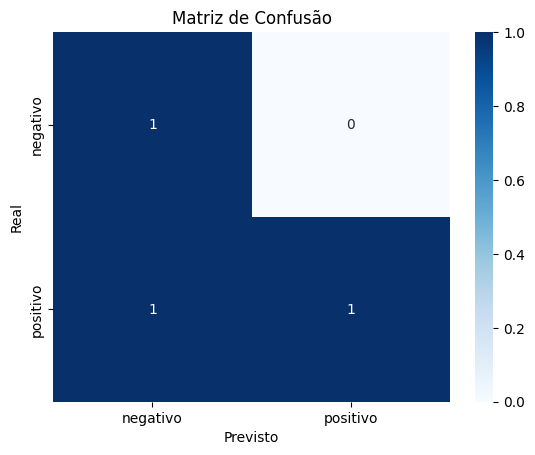

In [ ]:
# Avalia o modelo no conjunto de teste
perda, acuracia = modelo_lstm.evaluate(x_teste, y_teste, verbose=0)
print(f"\nAcurácia do modelo no conjunto de teste: {acuracia*100:.2f}%")
print(f"Perda do modelo no conjunto de teste: {perda:.4f}")

# Fazer previsões no conjunto de teste
y_pred_prob = modelo_lstm.predict(x_teste)
y_pred_classes = (y_pred_prob > 0.5).astype(int) # Converter probabilidades para 0 ou 1

print("\n--- Relátório de Classificação ---")
print(classification_report(y_teste, y_pred_classes, target_names=['negativo','positivo']))

print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_teste, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['negativo','positivo'], yticklabels=['negativo','positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### Passo 5: Testar o Modelo com Novas Frases

In [ ]:
from re import VERBOSE
# utilizando o modelo treinado
def prever_sentimento(modelo, tokenizer, max_seq_len, frase_nova, mapeamento_sentimento):
  """
  Prevê o sentimento de uma nova frase.
  """
  # Converter a frase para sequência numérica
  sequencia_numerica = tokenizer.texts_to_sequences([frase_nova])

  # Se a frase tem palavras desconhecidas, o tokenizer retorna uma lista vazia ou valores 0
  if not sequencia_numerica:
    print(f"Aviso: A frase '{frase_nova}' contém apenas palavras desconhecidas.")
    return "Desconhecido" # Ou outra indicação

  sequencia_numerica = sequencia_numerica [0] # Pega a primeira (e única) sequência

  # Padronizar o comprimento da sequência de entrada
  sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='post')

  # Fazer a previsão (probabilidade)
  probabilidade_positiva = modelo.predict(sequencia_padded, verbose=0)[0][0]

  # Inverter o mapeamento para obter o nome do sentimento
  mapeamento_inverso = {v: k for k, v in mapeamento_sentimento.items()}

  # Classificar com base no limiar de 0.5
  if probabilidade_positiva >= 0.5:
    return mapeamento_inverso[1] # 'positivo'
  else:
    return mapeamento_inverso[0] # 'negativo'

  return sentimento_previsto

# Testar o modelo com novas frases
print("\n--- Testando o Modelo LSTM com Novas Frases ---")

frase_nova_1 = "gostei muito de filme, excelente!"
sentimento_1 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_1, mapeamento_sentimento)
print(f"Frase: '{frase_nova_1}' -> Sentimento previsto: '{sentimento_1}'")

frase_nova_2 = "odiei o livro, muito entediante"
sentimento_2 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_2, mapeamento_sentimento)
print(f"Frase: '{frase_nova_2}' -> Sentimento previsto: '{sentimento_2}'")

frase_nova_3 = "a aula de pln é ótima"
sentimento_3 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_3, mapeamento_sentimento)
print(f"Frase: '{frase_nova_3}' -> Sentimento previsto: '{sentimento_3}'")

frase_nova_4 = "o atendimento foi péssimo"
sentimento_4 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_4, mapeamento_sentimento)
print(f"Frase: '{frase_nova_4}' -> Sentimento previsto: '{sentimento_4}'")

frase_nova_5 = "esse produto não vale a pena, é caro"
sentimento_5 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_5, mapeamento_sentimento)
print(f"Frase: '{frase_nova_5}' -> Sentimento previsto: '{sentimento_5}'")

frase_nova_6 = "o filme é legal" # Frase curta e ambígua para um modelo pequeno
sentimento_6 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_6, mapeamento_sentimento)
print(f"Frase: '{frase_nova_6}' -> Sentimento previsto: '{sentimento_6}'")

frase_nova_7 = "isso é horrível, que tristeza"
sentimento_7 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_7, mapeamento_sentimento)
print(f"Frase: '{frase_nova_7}' -> Sentimento previsto: '{sentimento_7}'")


--- Testando o Modelo LSTM com Novas Frases ---
Frase: 'gostei muito de filme, excelente!' -> Sentimento previsto: 'positivo'
Frase: 'odiei o livro, muito entediante' -> Sentimento previsto: 'positivo'
Frase: 'a aula de pln é ótima' -> Sentimento previsto: 'positivo'
Frase: 'o atendimento foi péssimo' -> Sentimento previsto: 'negativo'
Frase: 'esse produto não vale a pena, é caro' -> Sentimento previsto: 'negativo'
Frase: 'o filme é legal' -> Sentimento previsto: 'positivo'
Frase: 'isso é horrível, que tristeza' -> Sentimento previsto: 'negativo'
